<a href="https://colab.research.google.com/github/kenanmorani/Images_Preprocessing/blob/main/otsu_Errod_Dialate_Masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
from skimage.segmentation import chan_vese
from skimage.io import imread
from skimage.color import rgb2gray
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
image = cv2.imread('/content/drive/MyDrive/Covid_data/Training Set/covid/covid/ct_scan_100/22.jpg')

In [86]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [87]:
img = cv2.GaussianBlur(img, (5, 5), 0)

In [88]:
# img = cv2.threshold(img, 115, 255, cv2.THRESH_BINARY)[1]
(T, img) = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
img = cv2.erode(img, None, iterations=2)
img = cv2.dilate(img, None, iterations=2)

In [83]:
T

112.0

Text(0.5, 1.0, 'Segmented Image')

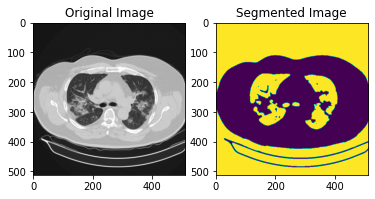

In [94]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)
#plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title('Segmented Image')

In [90]:
from google.colab.patches import cv2_imshow

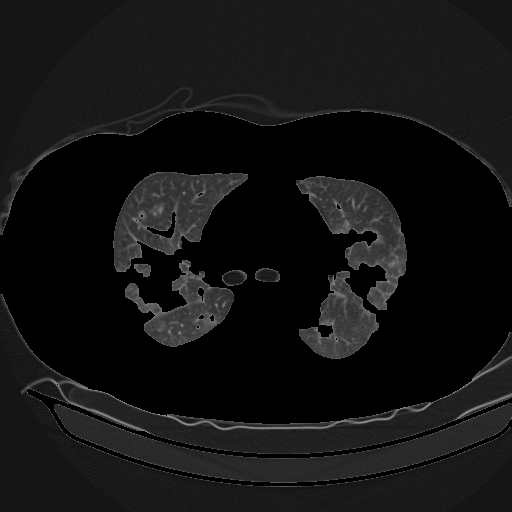

In [92]:
# visualize only the masked regions in the image
masked = cv2.bitwise_and(image, image, mask=img)
cv2_imshow(masked)
#cv2.waitKey(0)

REFERENCE:
https://www.pyimagesearch.com/2021/04/28/opencv-thresholding-cv2-threshold/